In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_excel('/content/drive/MyDrive/통계 학부 연구/Data_infector_infectee_0810.xlsx')

In [4]:
df

,id,신고일,감염경로,선행확진id
0,6,2020-01-30,국내,#3
1,8,2020-01-30,국외,#7
2,9,2020-01-30,국내,#5
3,10,2020-01-31,국내,#6
4,11,2020-01-31,국내,#6
...,...,...,...,...
183891,667382,2022-01-09,국내,#666854
183892,667383,2022-01-09,국내,#655359
183893,667385,2022-01-09,국내,#638136
183894,667388,2022-01-09,국내,#653374


In [5]:
# 다른 Rt와 시기를 맞추기 위해 - 시작 지점
df.index[df['신고일'] == '2020-07-01']

Int64Index([2341, 2344, 2348, 2349, 2350, 2352, 2353, 2354, 2355, 2356, 2357,
            2358, 2360, 2361, 2362, 2364, 2366, 2374],
           dtype='int64')

In [6]:
# 다른 Rt와 시기를 맞추기 위해 - 끝 지점
df.index[df['신고일'] == '2020-11-15']

Int64Index([8446, 8448, 8453, 8454, 8455, 8462, 8463, 8464, 8465, 8468,
            ...
            8673, 8674, 8695, 8721, 8722, 8723, 8795, 8796, 8812, 8857],
           dtype='int64', length=151)

In [7]:
# 원본 저장
df2=df.copy()

# 국내 값만 가져옴
df=df[df.감염경로=='국내'] 

# NaN 값 제거
df=df.dropna()

# 다른 Rt와 시기를 맞춰 진행, 끝지점의 제일 첫번째 부분을 추출한 이유는 날짜가 뒤죽박죽이라 뒤에 날짜가 너무 많이 나와서 끊음
df=df.loc[2341:8446,:]

In [8]:
df

,id,신고일,감염경로,선행확진id
2341,12862,2020-07-01,국내,#12555
2342,12863,2020-06-30,국내,#12784
2343,12864,2020-06-30,국내,#12395
2344,12867,2020-07-01,국내,#12826
2345,12868,2020-06-30,국내,#12839
...,...,...,...,...
8442,28575,2020-11-14,국내,#28512
8443,28576,2020-11-14,국내,#28512
8444,28577,2020-11-14,국내,#28507
8445,28578,2020-11-14,국내,#28507


In [9]:
# 시간마다 weibull distribution을 만들기 위해 시간만 추출
date=df.신고일.unique()
date=sorted(date) # 날짜 뒤죽박죽이라 정렬함
date

['2020-06-30',
 '2020-07-01',
 '2020-07-02',
 '2020-07-03',
 '2020-07-04',
 '2020-07-05',
 '2020-07-06',
 '2020-07-07',
 '2020-07-08',
 '2020-07-09',
 '2020-07-10',
 '2020-07-11',
 '2020-07-12',
 '2020-07-13',
 '2020-07-14',
 '2020-07-15',
 '2020-07-16',
 '2020-07-17',
 '2020-07-18',
 '2020-07-19',
 '2020-07-20',
 '2020-07-21',
 '2020-07-22',
 '2020-07-23',
 '2020-07-24',
 '2020-07-25',
 '2020-07-26',
 '2020-07-27',
 '2020-07-28',
 '2020-07-29',
 '2020-07-30',
 '2020-07-31',
 '2020-08-01',
 '2020-08-02',
 '2020-08-03',
 '2020-08-04',
 '2020-08-05',
 '2020-08-06',
 '2020-08-07',
 '2020-08-08',
 '2020-08-09',
 '2020-08-10',
 '2020-08-11',
 '2020-08-12',
 '2020-08-13',
 '2020-08-14',
 '2020-08-15',
 '2020-08-16',
 '2020-08-17',
 '2020-08-18',
 '2020-08-19',
 '2020-08-20',
 '2020-08-21',
 '2020-08-22',
 '2020-08-23',
 '2020-08-24',
 '2020-08-25',
 '2020-08-26',
 '2020-08-27',
 '2020-08-28',
 '2020-08-29',
 '2020-08-30',
 '2020-08-31',
 '2020-09-01',
 '2020-09-02',
 '2020-09-03',
 '2020-09-

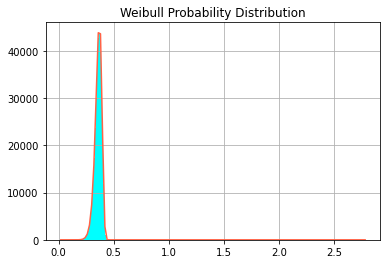

In [10]:
# wallinga 매개변수 w -> weibull distribution
import numpy as np
import matplotlib.pyplot as plt

n_MC=10**6
mu=5.19
sig=1.39
shape=mu**2/sig**2
scale=sig**2/mu

def my_weibull(x,m,n):
    return(m/n)*(x/n)**(m-1)*np.exp(-(x/n)**m)

y1=scale*np.random.weibull(shape,n_MC)
x2=np.arange(1,len(date)+1)/50.
y2=my_weibull(x2,shape,scale)

plt.figure(1)
count,bins,ignored=plt.hist(y1,bins=100,color='Aqua')
y_scale=count.max()/y2.max()
y2=y2*y_scale
plt.plot(x2,y2,color='Tomato')
plt.title('Weibull Probability Distribution')
plt.grid()
plt.show()

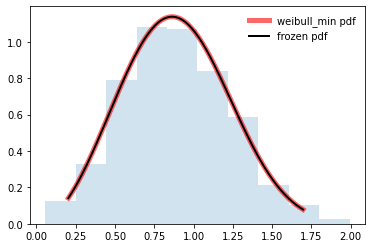

In [11]:
# weibull distribution : weibull_min
from scipy.stats import weibull_min
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline 

fig, ax = plt.subplots(1, 1)
c = 2.89
mean, var, skew, kurt = weibull_min.stats(c, moments='mvsk')

x = np.linspace(weibull_min.ppf(0.01, c),
                weibull_min.ppf(0.99, c), len(date))

ax.plot(x, weibull_min.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='weibull_min pdf')

rv = weibull_min(c)
y_min=rv.pdf(x)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = weibull_min.ppf([0.001, 0.5, 0.999], c)
np.allclose([0.001, 0.5, 0.999], weibull_min.cdf(vals, c))

r = weibull_min.rvs(c, size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

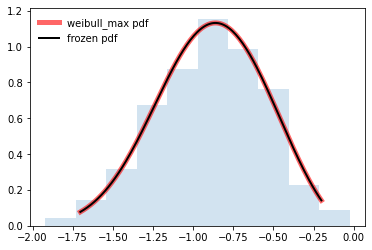

In [12]:
from scipy.stats import weibull_max
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
c = 2.87
mean, var, skew, kurt = weibull_max.stats(c, moments='mvsk')

x = np.linspace(weibull_max.ppf(0.01, c),
                weibull_max.ppf(0.99, c), len(date))
ax.plot(x, weibull_max.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='weibull_max pdf')

rv = weibull_max(c)
y_max=rv.pdf(x)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = weibull_max.ppf([0.001, 0.5, 0.999], c)
np.allclose([0.001, 0.5, 0.999], weibull_max.cdf(vals, c))

r = weibull_max.rvs(c, size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [13]:
# 신고일과 매개변수 w를 매치하기 위해 만듦 - weibull_min
wb=dict(zip(date,y2))
#wb

In [14]:
# 신고일과 매개변수 w를 매치하기 위해 만듦 - my_weibull
wb2=dict(zip(date,y_min))
#wb2

In [15]:
# 신고일과 매개변수 w를 매치하기 위해 만듦 - y_max
wb3=dict(zip(date,y_max))
#wb3

In [16]:
# 신고일과 w 매개변수 매치
df['w'] = df.신고일.map(wb)
df['w2'] = df.신고일.map(wb2)
df['w3'] = df.신고일.map(wb3)
df

,id,신고일,감염경로,선행확진id,w,w2,w3
2341,12862,2020-07-01,국내,#12555,3.672485e-08,0.155522,0.083422
2342,12863,2020-06-30,국내,#12784,4.668988e-12,0.141254,0.077630
2343,12864,2020-06-30,국내,#12395,4.668988e-12,0.141254,0.077630
2344,12867,2020-07-01,국내,#12826,3.672485e-08,0.155522,0.083422
2345,12868,2020-06-30,국내,#12839,4.668988e-12,0.141254,0.077630
...,...,...,...,...,...,...,...
8442,28575,2020-11-14,국내,#28512,0.000000e+00,0.084340,0.156253
8443,28576,2020-11-14,국내,#28512,0.000000e+00,0.084340,0.156253
8444,28577,2020-11-14,국내,#28507,0.000000e+00,0.084340,0.156253
8445,28578,2020-11-14,국내,#28507,0.000000e+00,0.084340,0.156253


In [17]:
# t_i를 구하기 쉽게하기 위해
id_date=dict(zip(df.id,df.신고일))

# i 값이 실제로 있는지 확인하기 위해
check=list(df.id)

In [18]:
# 와이링가 식
# w(t_i-t_j)/sigma i!=k w(t_i-t_k)
# t_i : case i가 감염된 시간
# t_j : case j가 감염된 시간

In [19]:
from datetime import datetime
def Wallinga(m,w):
  P=[]
  j=df.loc[m,'id'] # case j
  i=df.loc[m,'선행확진id'] # case i
  i=i.replace('\n',',')
  for tok in i.split(','): # case i가 여러개인 경우 존재
    tok = re.sub(r'[^0-9]', '', tok) # 선행 id만 추출
    if tok != '':
      if int(tok) in check: # 선행 id(i)가 주어진 데이터에 존재하는 경우
        total=0
        t_j=id_date[int(j)] # case j가 감염된 시간
        t_i=id_date[int(tok)]# case i가 감염된 시간
        t_j=datetime.strptime(t_j, '%Y-%m-%d')
        t_i=datetime.strptime(t_i, '%Y-%m-%d')
        for k in df.index: # Pij의 분모 구하기
          k=df.loc[k,'id'] # case k
          if i != k:
            t_k=datetime.strptime(id_date[int(k)], '%Y-%m-%d')
            total+=w*(t_i-t_k).days
        day=w*(t_i-t_j).days # Pij의 분자 구하기
        p=day/total
      else: p=np.nan # 선행 id가 존재하지 않는 경우
      P.append(p) # Pij
  return np.nansum(P) # Rj, nansum: nan을 무시하고 더함

In [20]:
for m in df.index:
  print(df.loc[m,'신고일'])
  df.loc[m,'Wallinga']=Wallinga(m,df.loc[m,'w'])

2020-07-01
2020-06-30
2020-06-30
2020-07-01
2020-06-30
2020-06-30
2020-06-30
2020-07-01
2020-07-01
2020-07-01
2020-06-30
2020-07-01
2020-07-01
2020-07-01
2020-07-01
2020-07-01
2020-07-01
2020-07-01
2020-07-02
2020-07-01
2020-07-01
2020-07-01
2020-07-02
2020-07-01
2020-07-02
2020-07-01
2020-07-02
2020-07-02
2020-07-02
2020-07-02
2020-07-02
2020-07-02
2020-07-02
2020-07-01
2020-07-02
2020-07-02
2020-07-02
2020-07-02
2020-07-02
2020-07-02
2020-07-03
2020-07-04
2020-07-03
2020-07-03
2020-07-03
2020-07-04
2020-07-03
2020-07-03
2020-07-03
2020-07-03
2020-07-04
2020-07-04
2020-07-04
2020-07-03
2020-07-03
2020-07-05
2020-07-05
2020-07-05
2020-07-03
2020-07-05
2020-07-04
2020-07-05
2020-07-05
2020-07-04
2020-07-05
2020-07-05
2020-07-05
2020-07-05
2020-07-05
2020-07-05
2020-07-05
2020-07-06
2020-07-02
2020-07-06
2020-07-06
2020-07-06
2020-07-07
2020-07-06
2020-07-06
2020-07-07
2020-07-06
2020-07-07
2020-07-07
2020-07-08
2020-07-07
2020-07-04
2020-07-04
2020-07-08
2020-07-07
2020-07-07
2020-07-07

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2020-08-19
2020-08-19
2020-08-19
2020-08-18
2020-08-19
2020-08-20
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-20
2020-08-19
2020-08-20
2020-08-20
2020-08-20
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-20
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-20
2020-08-20
2020-08-19
2020-08-19
2020-08-19
2020-08-20
2020-08-19
2020-08-19
2020-08-20
2020-08-19
2020-08-20
2020-08-20
2020-08-19
2020-08-19
2020-08-20
2020-08-20
2020-08-19
2020-08-20
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-19
2020-08-20
2020-08-20
2020-08-20
2020-08-20
2020-08-20
2020-08-19
2020-08-20
2020-08-19
2020-08-20
2020-08-20
2020-08-19
2020-08-20
2020-08-20
2020-08-20
2020-08-20
2020-08

In [21]:
for m in df.index:
  #print(m)
  df.loc[m,'Wallinga2']=Wallinga(m,df.loc[m,'w2'])

In [22]:
for m in df.index:
  #print(m)
  df.loc[m,'Wallinga3']=Wallinga(m,df.loc[m,'w3'])

In [23]:
#Wallinga(102)

TypeError: ignored

In [24]:
df

,id,신고일,감염경로,선행확진id,w,w2,w3,Wallinga,Wallinga2,Wallinga3
2341,12862,2020-07-01,국내,#12555,3.672485e-08,0.155522,0.083422,0.0,0.000000,0.000000
2342,12863,2020-06-30,국내,#12784,4.668988e-12,0.141254,0.077630,0.0,0.000000,0.000000
2343,12864,2020-06-30,국내,#12395,4.668988e-12,0.141254,0.077630,0.0,0.000000,0.000000
2344,12867,2020-07-01,국내,#12826,3.672485e-08,0.155522,0.083422,0.0,0.000000,0.000000
2345,12868,2020-06-30,국내,#12839,4.668988e-12,0.141254,0.077630,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
8442,28575,2020-11-14,국내,#28512,0.000000e+00,0.084340,0.156253,0.0,0.000000,0.000000
8443,28576,2020-11-14,국내,#28512,0.000000e+00,0.084340,0.156253,0.0,0.000000,0.000000
8444,28577,2020-11-14,국내,#28507,0.000000e+00,0.084340,0.156253,0.0,0.000000,0.000000
8445,28578,2020-11-14,국내,#28507,0.000000e+00,0.084340,0.156253,0.0,0.000000,0.000000


In [25]:
# 시간대별로 바꿈
df3=df.groupby('신고일')['Wallinga'].sum()
df3.values
df3.index
df4=pd.DataFrame(df3)

In [26]:
# 시간대별로 바꿈
df5=df.groupby('신고일')['Wallinga2'].sum()
df5.values
df5.index
df6=pd.DataFrame(df5)

In [27]:
# 시간대별로 바꿈
df7=df.groupby('신고일')['Wallinga3'].sum()
df7.values
df7.index
df8=pd.DataFrame(df7)

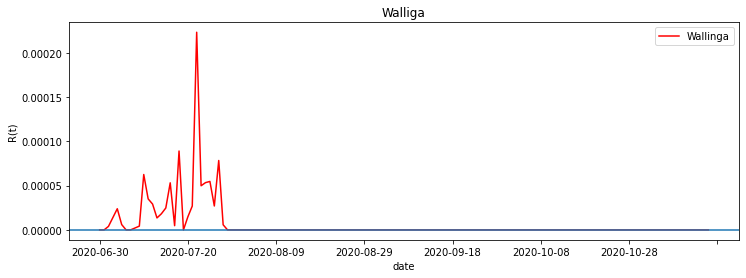

In [28]:
# walliga
fig, ax = plt.subplots(1,1, figsize=(12, 4))

df4.plot(ax=ax, color='red')

ax.set_xlabel('date')
ax.set_ylabel('R(t)')
ax.axhline(y=0)
ax.set_title('Walliga')
plt.show()

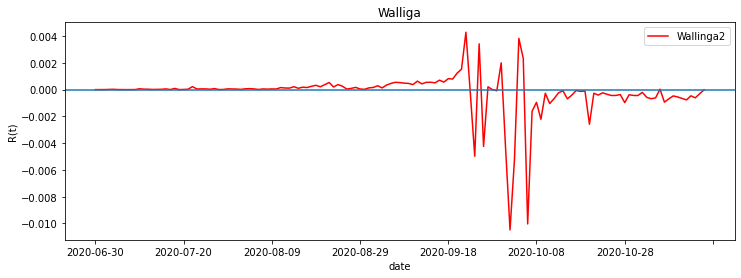

In [29]:
# walliga
fig, ax = plt.subplots(1,1, figsize=(12, 4))

df6.plot(ax=ax, color='red')

ax.set_xlabel('date')
ax.set_ylabel('R(t)')
ax.axhline(y=0)
ax.set_title('Walliga')
plt.show()

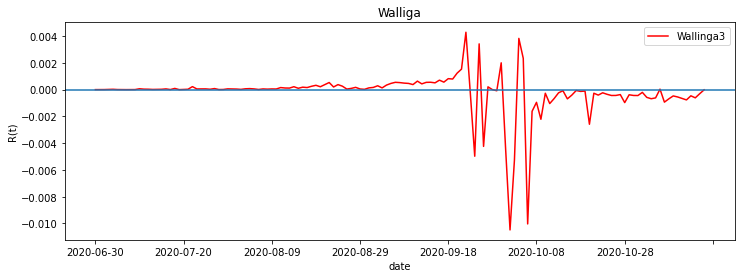

In [30]:
# walliga
fig, ax = plt.subplots(1,1, figsize=(12, 4))

df8.plot(ax=ax, color='red')

ax.set_xlabel('date')
ax.set_ylabel('R(t)')
ax.axhline(y=0)
ax.set_title('Walliga')
plt.show()

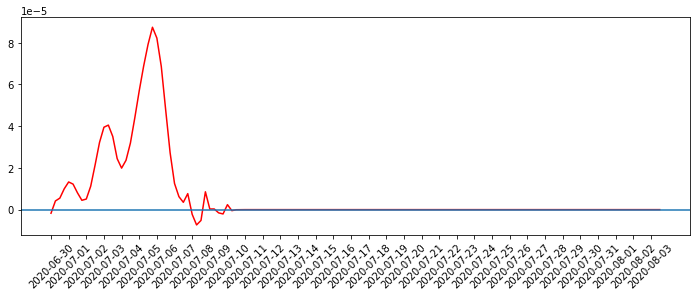

In [35]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
x=df3.index
y=df3.values
yhat=savgol_filter(y,29,10)
plt.plot(x,yhat,'r')
plt.xticks(ticks=x, labels=x, rotation=45)
plt.locator_params(axis='x', nbins=len(x)/4)
plt.axhline(y=0)
plt.show()

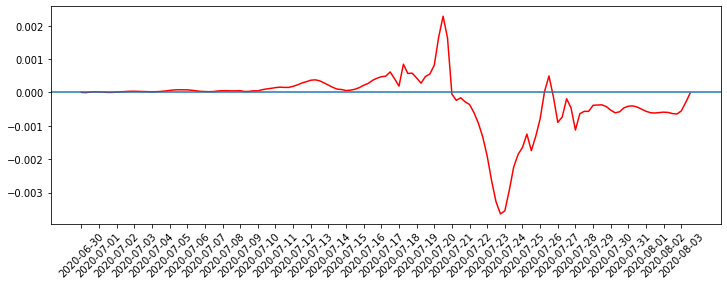

In [32]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
x=df5.index
y=df5.values
yhat=savgol_filter(y,31,10)
plt.plot(x,yhat,'r')
plt.xticks(ticks=x, labels=x, rotation=45)
plt.locator_params(axis='x', nbins=len(x)/4)
plt.axhline(y=0)
plt.show()

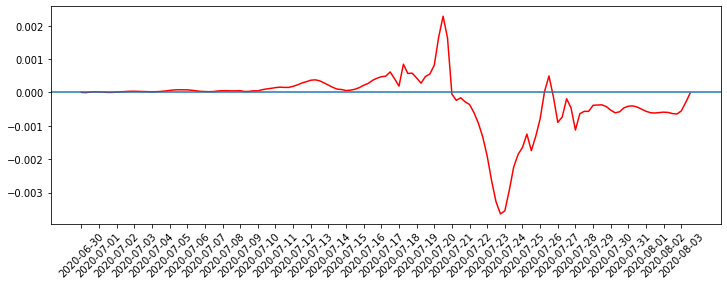

In [33]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
x=df7.index
y=df7.values
yhat=savgol_filter(y,31,10)
plt.plot(x,yhat,'r')
plt.xticks(ticks=x, labels=x, rotation=45)
plt.locator_params(axis='x', nbins=len(x)/4)
plt.axhline(y=0)
plt.show()